# Networks Module Demo

This notebook demonstrates the key functionalities of the `networks` module from miToolsPro.

In [1]:
import pandas as pd
import random
import numpy as np
from mitoolspro.networks import networks as nw
import networkx as nx
import matplotlib.pyplot as plt

## 1. Creating Sample Data

First, let's create some sample proximity data to work with.

In [2]:
np.random.seed(42)

products = [f'Node_{i}' for i in range(10)]
proximity_data = []

for i in range(len(products)):
    for j in range(i + 1, len(products)):
        weight = np.random.uniform(0, 1)
        proximity_data.append({
            'node_i': products[i],
            'node_j': products[j],
            'weight': weight
        })

proximity_df = pd.DataFrame(proximity_data)
print("Sample Proximity Data:")
display(proximity_df.head())

Sample Proximity Data:


,node_i,node_j,weight
0,Node_0,Node_1,0.374540
1,Node_0,Node_2,0.950714
2,Node_0,Node_3,0.731994
3,Node_0,Node_4,0.598658
4,Node_0,Node_5,0.156019


## 2. Building NetworkX Graphs

Let's create a basic network graph from our proximity data.

Number of nodes: 10
Number of edges: 45


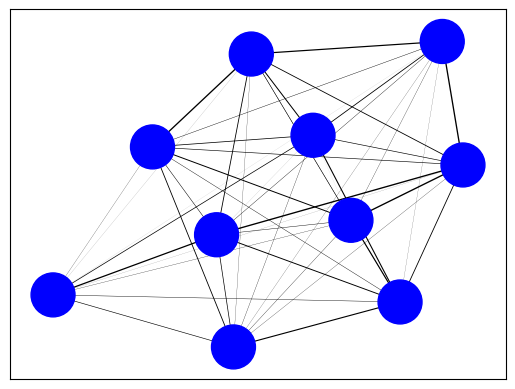

In [3]:
G = nw.build_nx_graph(proximity_df, "node_i", "node_j")
print(f"Number of nodes: {len(G.nodes)}")
print(f"Number of edges: {len(G.edges)}")
nw.draw_nx(G)

## 3. Building MST (Minimum Spanning Tree) Graph

Now let's create a minimum spanning tree graph with some extra edges.

Number of nodes in MST: 10
Number of edges in MST: 16


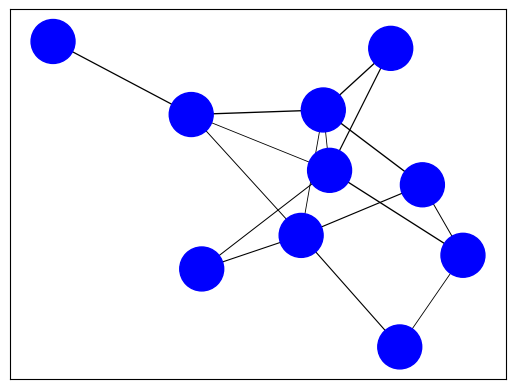

In [4]:
MST = nw.build_mst_graph(
    proximity_df,
    origin="node_i",
    destination="node_j",
    attribute='weight',
    pct_extra_edges=0.2
)
print(f"Number of nodes in MST: {len(MST.nodes)}")
print(f"Number of edges in MST: {len(MST.edges)}")
nw.draw_nx(MST)

## 4. Creating Interactive Visualizations

Let's create an interactive visualization using PyVis.

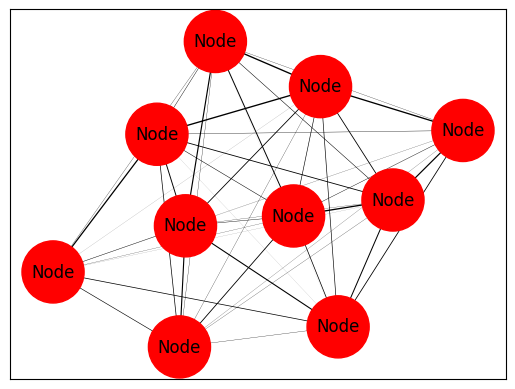

In [5]:
net = nw.build_vis_graph(
    G,
    nodes_sizes=20,
    nodes_colors=(255, 0, 0),
    nodes_labels='Node',
    node_label_size=14,
    net_height=500,
    physics=True,
    notebook=True
)
nx_net = nw.pyvis_to_networkx(net)
nw.draw_nx(nx_net)

## 5. Community Analysis

Let's analyze communities in our network.

In [6]:
communities = nw.distribute_items_in_communities(list(G.nodes), n_communities=3)
print("Communities:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

strength_stats = nw.average_strength_of_links_within_communities(G, communities)
print("\nLink strength statistics within communities:")
for key, value in strength_stats.items():
    print(f"{key}: {value:.3f}")

Communities:
Community 1: ['Node_5', 'Node_1', 'Node_0', 'Node_3']
Community 2: ['Node_7', 'Node_2', 'Node_8']
Community 3: ['Node_4', 'Node_9', 'Node_6']

Link strength statistics within communities:
mean: 0.394
std: 0.171
max: 0.544
min: 0.155


## 6. Saving and Loading Graphs

Let's demonstrate how to save and load graphs.

Saved graph files:
sample: None


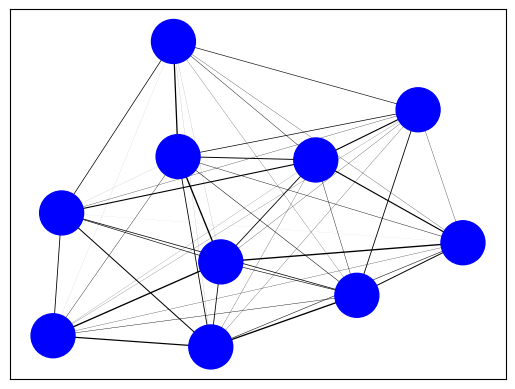

In [7]:
proximity_vectors = {'sample': proximity_df}
graphs, graph_files = nw.build_nx_graphs(
    proximity_vectors,
)

print("Saved graph files:")
for key, path in graph_files.items():
    print(f"{key}: {path}")

nw.draw_nx(graphs['sample'])

## 7. Advanced Visualizations

Let's explore different visualization styles and options.

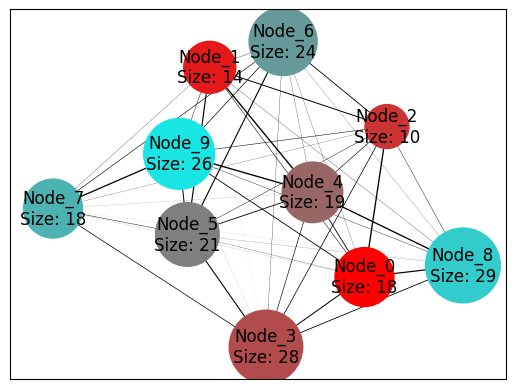

In [8]:
def create_custom_colors(n_nodes):
    colors = []
    for i in range(n_nodes):
        hue = i / n_nodes
        node_colors = (int(255 * (1 - hue)), int(255 * hue), int(255 * hue))
        node_colors = f"rgb({node_colors[0]}, {node_colors[1]}, {node_colors[2]})"
        colors.append(node_colors)
    return colors

node_colors = dict(zip(G.nodes, create_custom_colors(len(G.nodes))))
node_sizes = dict(zip(G.nodes, np.random.randint(10, 30, size=len(G.nodes))))
node_sizes = {node: int(size) for node, size in node_sizes.items()}
node_labels = {node: f"{node}\nSize: {size}" for node, size in node_sizes.items()}

net = nw.build_vis_graph(
    G,
    nodes_sizes=node_sizes,
    nodes_colors=node_colors,
    nodes_labels=node_labels,
    node_label_size=12,
    net_height=600,
    physics=True,
    physics_kwargs={
        'gravity': -500000,
        'spring_length': 200,
        'spring_strength': 0.1,
        'damping': 0.09
    },
    notebook=True
)
nx_net = nw.pyvis_to_networkx(net)
nw.draw_nx(nx_net)

### MST Visualization with Edge Weights

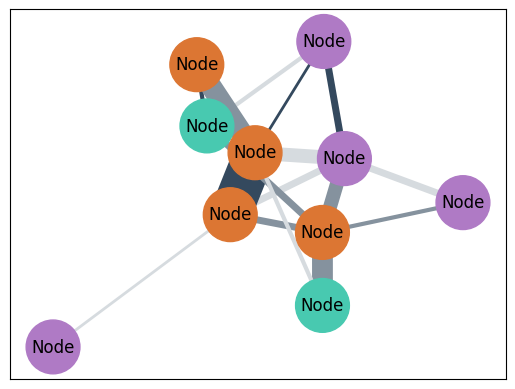

In [9]:
edges_widths = {
    pd.Interval(0, 0.3): 1,      
    pd.Interval(0.3, 0.6): 2,    
    pd.Interval(0.6, 1.0): 3,
    pd.Interval(1.0, 1.5): 5,
    pd.Interval(1.5, 2.0): 10,
    pd.Interval(2.0, 2.5): 15,
    pd.Interval(2.5, 3.0): 30
}

new_node_colors = {n: random.choice(['#af7ac5', '#48c9b0', '#dc7633']) for n in MST.nodes()}
nx.set_node_attributes(MST, new_node_colors, 'color')
new_widths = {(u, v): random.uniform(0.5, 3.0) for u, v in MST.edges()}
nx.set_edge_attributes(MST, new_widths, 'width')
new_edge_colors = {(u, v): random.choice(['#85929e', '#34495e', '#d6dbdf']) for u, v in MST.edges()}
nx.set_edge_attributes(MST, new_edge_colors, 'color')

net = nw.build_vis_graph(
    MST,
    nodes_sizes=15,
    nodes_labels='Node',
    node_label_size=12,
    edges_widths=edges_widths,
    net_height=500,
    physics=True,
    notebook=True
)
nx_net = nw.pyvis_to_networkx(net)
nw.draw_nx(nx_net)

### Community-Based Visualization

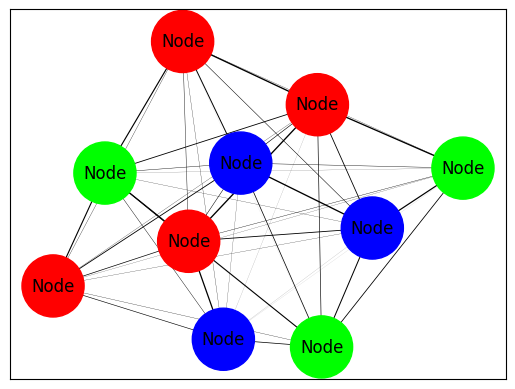

In [10]:
communities = nw.distribute_items_in_communities(list(G.nodes), n_communities=3)

community_colors = {
    0: (255, 0, 0),    # Red
    1: (0, 255, 0),    # Green
    2: (0, 0, 255)     # Blue
}

node_colors = {}
for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = community_colors[i]

net = nw.build_vis_graph(
    G,
    nodes_sizes=20,
    nodes_colors=node_colors,
    nodes_labels='Node',
    node_label_size=14,
    net_height=600,
    physics=True,
    notebook=True
)
g = nw.pyvis_to_networkx(net)
nw.draw_nx(g)

### Comparison of Original Graph vs MST

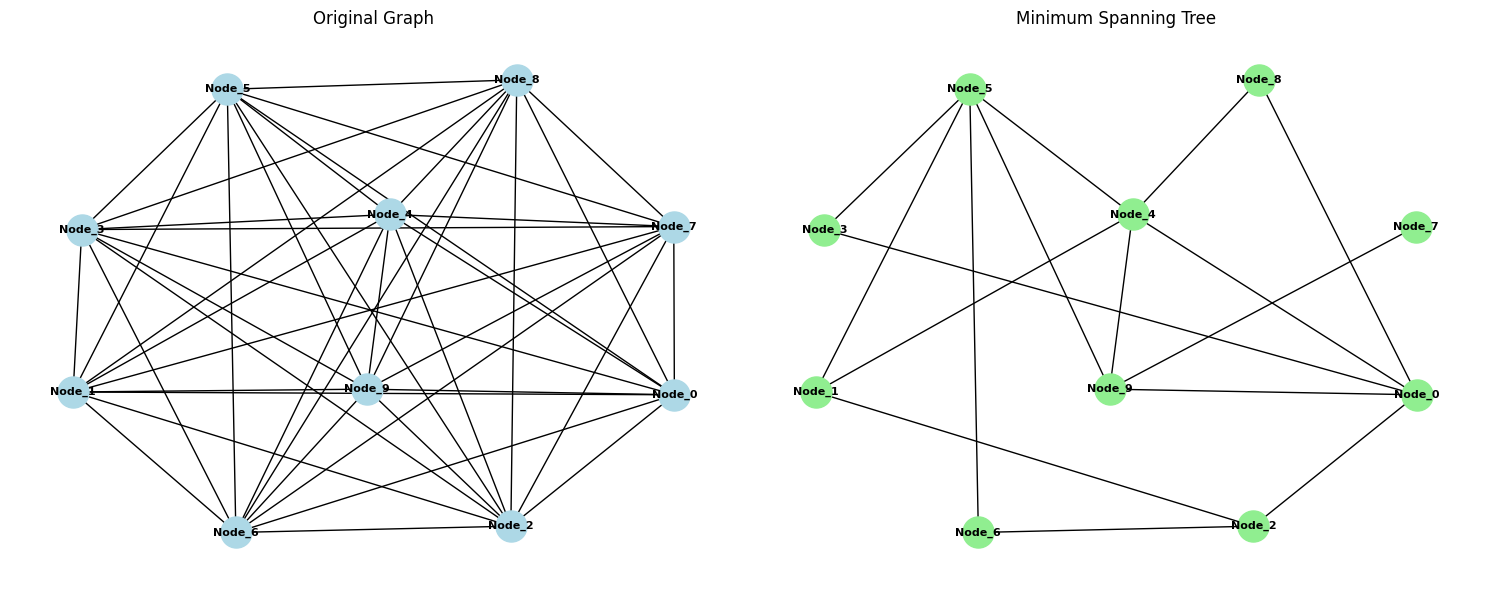

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

pos = nx.spring_layout(G)

nx.draw(G, pos, ax=ax1, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=8, font_weight='bold')
ax1.set_title('Original Graph')

nx.draw(MST, pos, ax=ax2, with_labels=True, node_color='lightgreen', 
        node_size=500, font_size=8, font_weight='bold')
ax2.set_title('Minimum Spanning Tree')

plt.tight_layout()
plt.show()

***